In [14]:
import pandas
import numpy
import tensorflow
import keras
import sklearn
import yfinance as yf
import pandas_datareader
import datetime
import matplotlib
import plotly

#print(python.__version__)
print(pandas.__version__)
print(numpy.__version__)
print(tensorflow.__version__)
print(keras.__version__)
print(sklearn.__version__)
print(yf.__version__)
#print(datetime.__version__)
print(matplotlib.__version__)
print(pandas_datareader.__version__)
print(plotly.__version__)
!python --version

2.2.2
2.0.2
2.19.0
3.10.0
1.6.1
0.2.66
3.10.0
0.10.0
5.24.1
Python 3.12.12


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [16]:
#download data set from yahoo finace it containe all the data set for stock pric
import yfinance as yf
import datetime as dt
stock = "AAPL"
start = dt.datetime(2000,1,1)
end = dt.datetime(2026,1,1)

df = yf.download(stock,start,end)



/tmp/ipykernel_15665/1919108945.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [17]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.839281,0.843498,0.762429,0.786328,535796800
2000-01-04,0.768521,0.829440,0.758680,0.811633,512377600
2000-01-05,0.779767,0.828971,0.772270,0.777893,778321600
2000-01-06,0.712287,0.802260,0.712287,0.795700,767972800
2000-01-07,0.746027,0.757274,0.716037,0.723534,460734400


In [18]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800
2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200
2025-12-30,273.079987,274.079987,272.279999,272.809998,22139600
2025-12-31,271.859985,273.679993,271.750000,273.059998,27293600


In [19]:
#shape of data set
print(f"\nshape of the data set {df.shape}")



shape of the data set (6539, 5)


In [20]:
#checking info of the data set
print(f"info of the data set is {df.info()}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6539 entries, 2000-01-03 to 2025-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6539 non-null   float64
 1   (High, AAPL)    6539 non-null   float64
 2   (Low, AAPL)     6539 non-null   float64
 3   (Open, AAPL)    6539 non-null   float64
 4   (Volume, AAPL)  6539 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 306.5 KB
info of the data set is None


In [21]:

#checking missing value
print(f"\n misssing value : {df.isnull().sum()}")


 misssing value : Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [22]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,6539.000000,6539.000000,6539.000000,6539.000000,6.539000e+03
mean,48.396738,48.879909,47.868249,48.357378,3.732367e+08
std,69.437885,70.110528,68.693655,69.367421,3.816933e+08
min,0.196741,0.197791,0.190743,0.194792,1.791060e+07
25%,2.147659,2.175701,2.119617,2.154107,1.061800e+08
50%,15.894492,16.015227,15.660722,15.794349,2.525152e+08
75%,51.187675,52.009663,50.827616,51.358235,5.012210e+08
max,286.190002,288.619995,283.299988,286.200012,7.421641e+09


In [23]:
#it will reset the index to 0
df = df.reset_index()

In [24]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [25]:
df.to_csv("powergrid.csv")
data01 = pd.read_csv('/home/moosaabbasi/stock trade predicton/powergrid.csv')
data01.head(5)

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,0,2000-01-03,0.8392806649208069,0.843497926813925,0.7624285047880487,0.7863277904024384,535796800
2,1,2000-01-04,0.7685208320617676,0.8294395791039839,0.7586798210785961,0.8116326908754726,512377600
3,2,2000-01-05,0.7797669172286987,0.8289711831558944,0.7722696339123498,0.7778925838863705,778321600
4,3,2000-01-06,0.7122871279716492,0.8022604296014583,0.7122871279716492,0.7957002882517805,767972800


In [26]:
#candelstick
#create a candelstick useing plotly


import plotly.graph_objects as go

fig = go.Figure(data = [go.Candlestick(x = data01['Date'], open = data01['Open'],
                                       high = data01['High'],
                                       low = data01['Low'],
                                       close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [27]:
df = df.drop(['Date'],axis=1)

/tmp/ipykernel_15665/3445417830.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [28]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.839281,0.843498,0.762429,0.786328,535796800
1,0.768521,0.829440,0.758680,0.811633,512377600
2,0.779767,0.828971,0.772270,0.777893,778321600
3,0.712287,0.802260,0.712287,0.795700,767972800
4,0.746027,0.757274,0.716037,0.723534,460734400


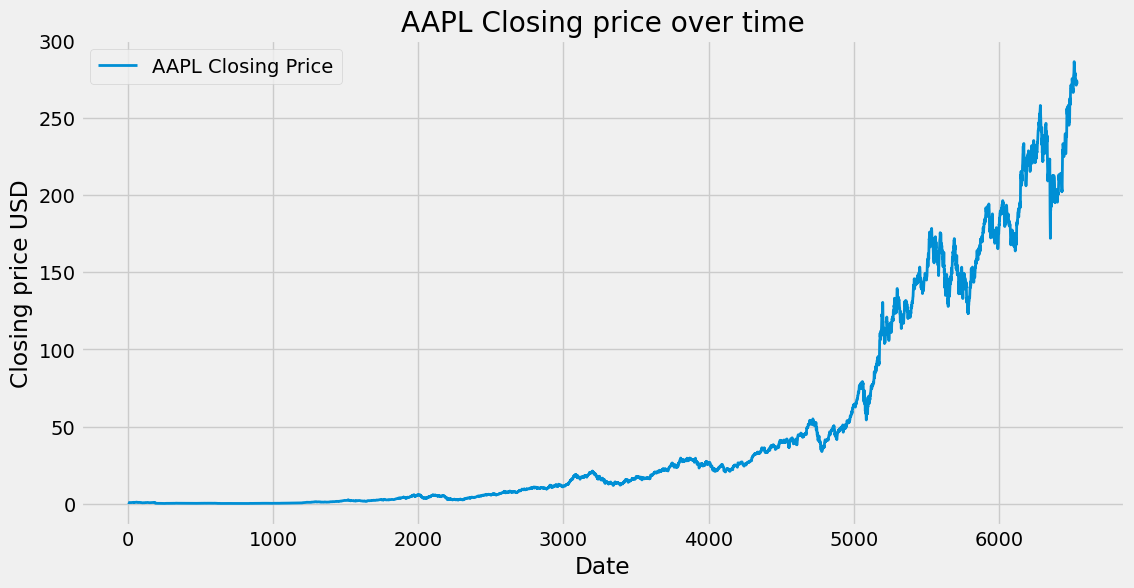

In [29]:
#creating a graph for closeing of stock
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price' , linewidth = 2)
plt.title(f'{stock} Closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing price USD')
plt.legend()
plt.show()

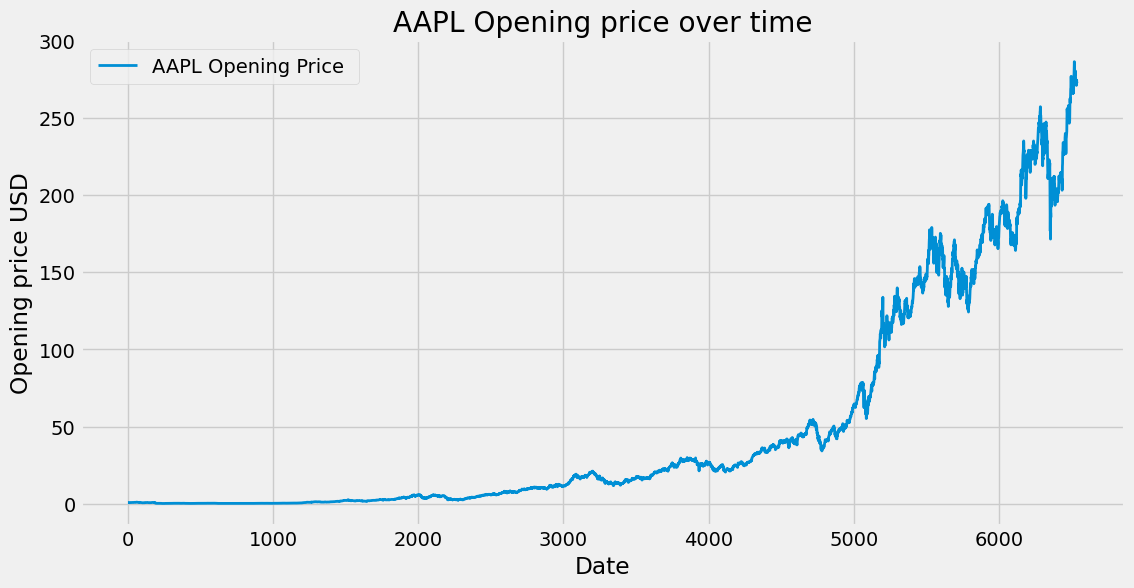

In [30]:
#Open stock
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label = f'{stock} Opening Price ', linewidth = 2)
plt.title(f'{stock} Opening price over time')
plt.xlabel('Date')
plt.ylabel('Opening price USD')
plt.legend()
plt.show()

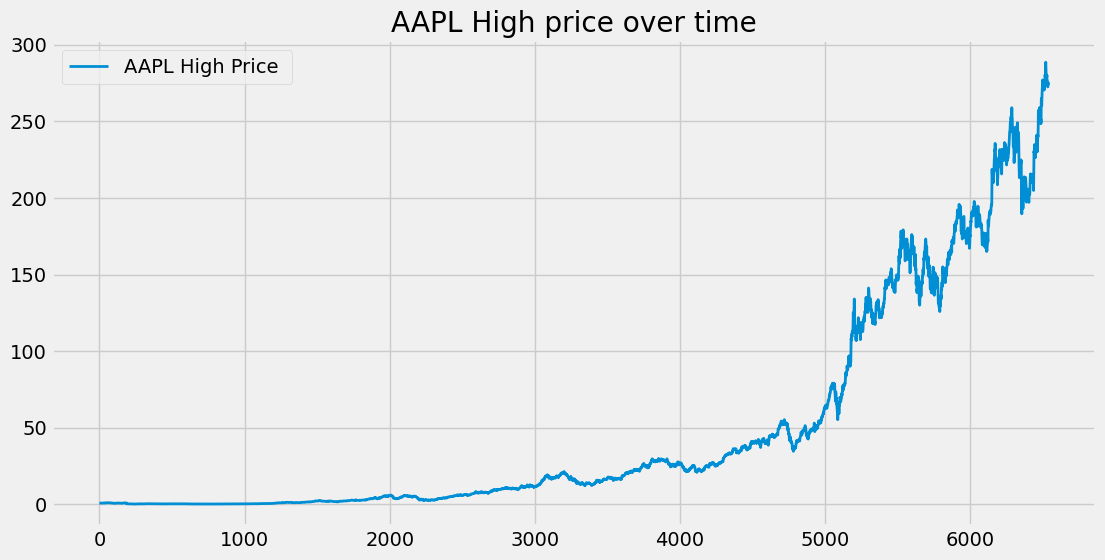

In [31]:
#high stock
plt.figure(figsize=(12,6))
plt.plot(df['High'], label = f'{stock} High Price ', linewidth = 2)
plt.title(f'{stock} High price over time')
plt.legend()
plt.show()

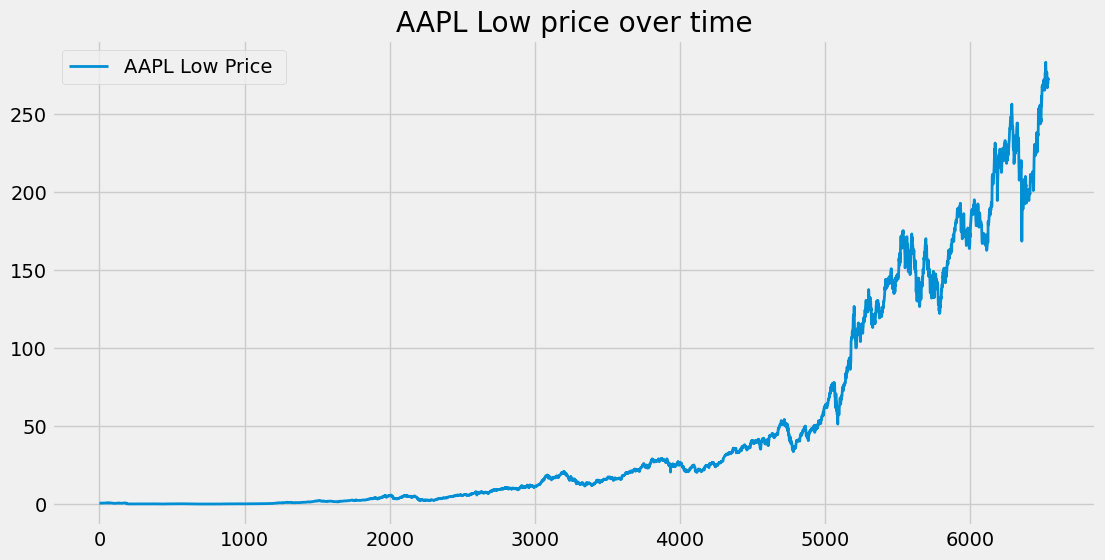

In [32]:
#lowstock
plt.figure(figsize=(12,6))
plt.plot(df['Low'], label = f'{stock} Low Price ', linewidth = 2)
plt.title(f'{stock} Low price over time')
plt.legend()
plt.show()

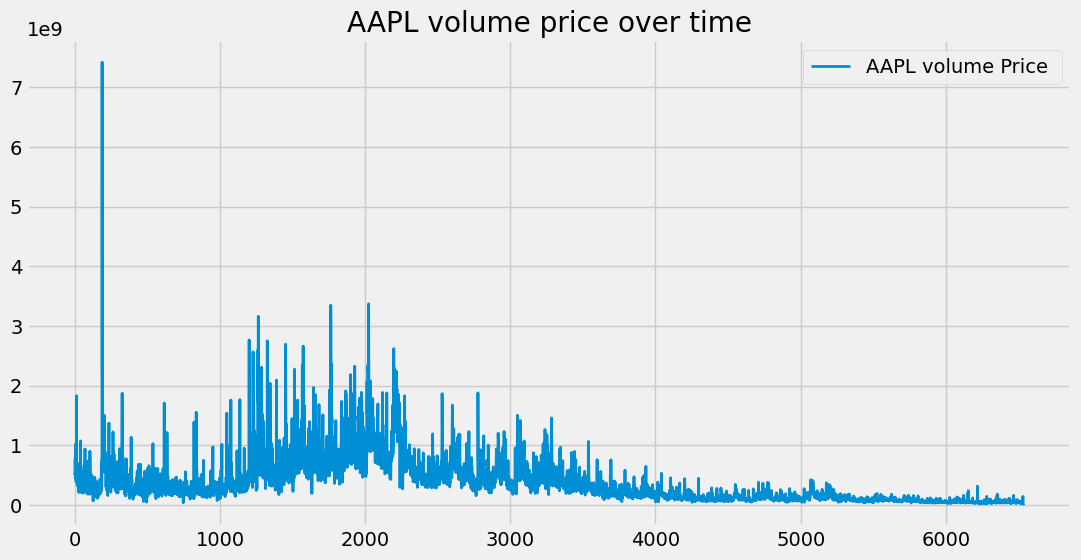

In [33]:
#Volume stock
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label = f'{stock} volume Price ', linewidth = 2)
plt.title(f'{stock} volume price over time')
plt.legend()
plt.show()

In [34]:
#moving average
mov_avg100 = df.Close.rolling(100).mean()
mov_avg100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6534,254.758237
6535,255.467301
6536,256.076881
6537,256.612004


In [35]:
mov_avg200 = df.Close.rolling(200).mean()
mov_avg200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6534,230.201515
6535,230.487312
6536,230.811285
6537,231.112873


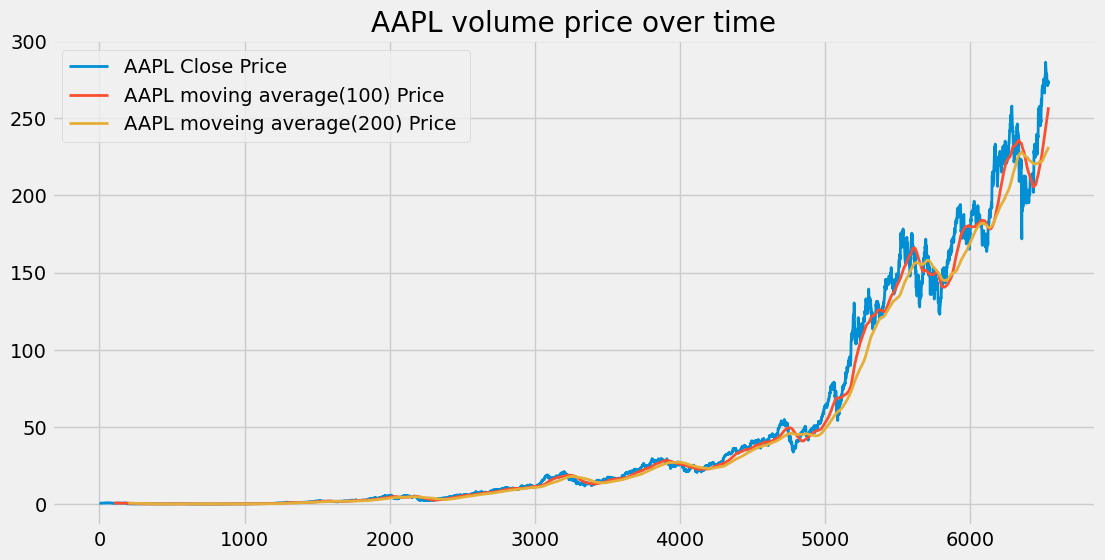

In [36]:
#creating plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Close Price ', linewidth = 2)
plt.plot(mov_avg100, label = f'{stock} moving average(100) Price ', linewidth = 2)
plt.plot(mov_avg200, label = f'{stock} moveing average(200) Price ', linewidth = 2)
plt.title(f'{stock} volume price over time')
plt.legend()
plt.show()

In [37]:
#exponontail moving average
exp_mov_avg100 = df.Close.ewm(span=100 , adjust=False).mean()
print(f"exponential moving average(100) {exp_mov_avg100}")

exp_mov_avg200 = df.Close.ewm(span=100 , adjust=False).mean()
print(f"exponential moving average(200) {exp_mov_avg200}")

exponential moving average(100) Ticker        AAPL
0         0.839281
1         0.837879
2         0.836729
3         0.834265
4         0.832517
...            ...
6534    256.813809
6535    257.142248
6536    257.471313
6537    257.780396
6538    258.059199

[6539 rows x 1 columns]
exponential moving average(200) Ticker        AAPL
0         0.839281
1         0.837879
2         0.836729
3         0.834265
4         0.832517
...            ...
6534    256.813809
6535    257.142248
6536    257.471313
6537    257.780396
6538    258.059199

[6539 rows x 1 columns]


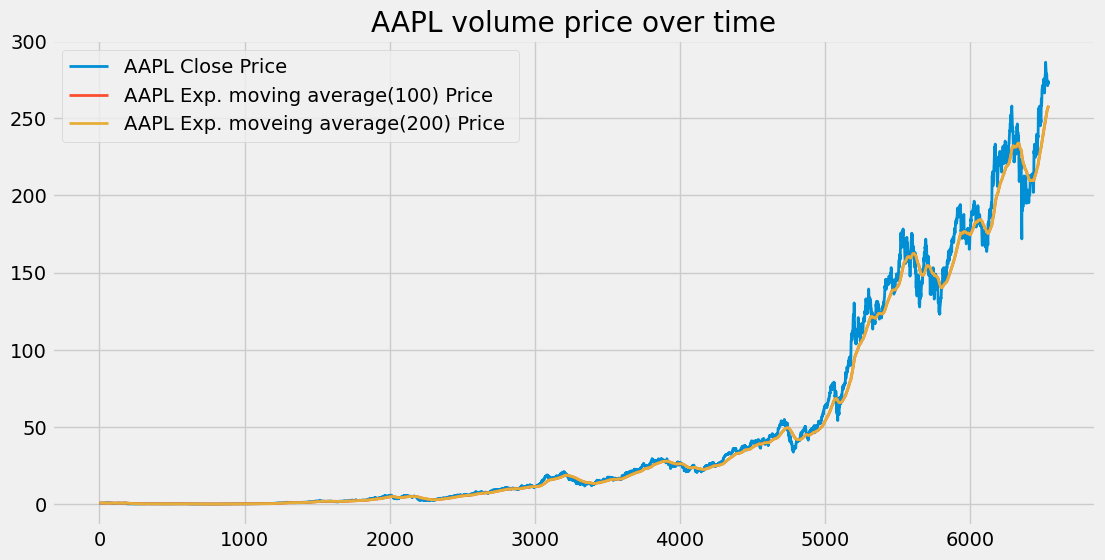

In [38]:
#creating plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Close Price ', linewidth = 2)
plt.plot(exp_mov_avg100, label = f'{stock} Exp. moving average(100) Price ', linewidth = 2)
plt.plot(exp_mov_avg200, label = f'{stock} Exp. moveing average(200) Price ', linewidth = 2)
plt.title(f'{stock} volume price over time')
plt.legend()
plt.show()

In [39]:
#training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])


In [40]:
print(data_training.shape)
print(data_testing.shape)


(4577, 1)
(1962, 1)


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
data_training_array = scaler.fit_transform(data_training)
#shape of training array
data_training_array.shape

(4577, 1)

In [43]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train) , np.array(y_train)

In [44]:
print(x_train.shape)
print(y_train.shape)

(4477, 100, 1)
(4477,)


LSTM Input -> 3D Array(batch_size, time_steps,seq_len)

LSTM 2D or 3D

2D -> (batch_size, units)

3D -> (batch_size , time_steps , units)

In [45]:
#model building
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential


In [46]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

2026-01-11 14:00:12.491613: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/moosaabbasi/stock trade predicton/venv_tf/lib64/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train,y_train, epochs= 50)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 59s 358ms/step - loss: 0.0396
Epoch 2/50


KeyboardInterrupt: 

In [ ]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days,data_testing], ignore_index = True)
final_df.head(5)

Ticker,AAPL
0,37.280472
1,36.398399
2,36.461391
3,36.442745
4,36.659760


In [ ]:
input_data = scaler.fit_transform(final_df)
print(input_data.shape)

(2062, 1)


In [ ]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test= np.array(x_test) , np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(1962, 100, 1)
(1962,)


In [ ]:
y_predicted = model.predict(x_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step


In [ ]:
y_predicted.shape

(1962, 1)

In [ ]:
scaler.scale_

array([0.00396212])

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

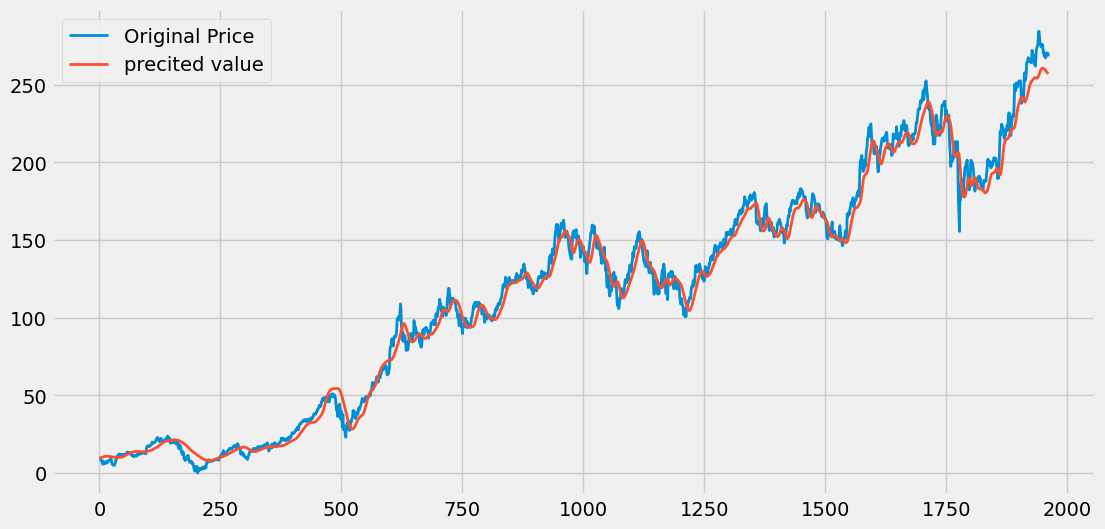

In [ ]:
#creating plot
plt.figure(figsize=(12,6))
plt.plot(y_test, label = 'Original Price ',linewidth = 2)
plt.plot(y_predicted, label ="precited value",linewidth = 2)
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

2.2.2
2.0.2
2.19.0
3.10.0
1.6.1
0.2.66
3.10.0
0.10.0
5.24.1
Python 3.12.12
